# Data visualization in Python: introduction to plotnine

This lesson is modified from:
[Software Carpentry workshop on data visualization in R](https://github.com/AnnaWilliford/SWC_fall2017_lessons/blob/master/Software%20Carpentry%20Workshop-%20Lesson4-%20Data%20visualization%20with%20ggplot2.md)  
and [Data Carpenry Lesson](https://datacarpentry.org/python-ecology-lesson/aio.html)

## Objectives
* To be able to use `plotnine` to generate publication quality graphics.
* To understand the basic grammar of graphics, including the aesthetics and geometry layers, adding statistics, transforming scales, and coloring or panelling by groups.


## Introduction
Plotting your data is one of the best ways to explore various relationships between variables.  
And it is probably the best way to present the results of your analysis.

There are three main plotting systems in Python, the [matplotlib](http://matplotlib.org), [seabourn](http://seabourn.com), and [Bokeh](https://community.modeanalytics.com/python/libraries/bokeh/) packages. 
Today we'll be learning about the `plotnine` package, because it is the most effective for creating publication quality graphics.

`plotnine` is an implementation of grammar of graphics in Python and it is based on ggplot2 R package. The grammar of graphics is the idea that any plot can be expressed from the same set of components: a **data set**, a **coordinate system**, and a set of **geoms**--the visual representation of data points

Building blocks of a graph include:

* data
* aesthetic mappings
* geometric objects
* statistical transformations
* scales
* coordinate systems
* position adjustments
* faceting

The key to understanding `plotnine` is thinking about a figure in layers. This idea may be familiar to you if you have used image editing programs like Photoshop, Illustrator, or Inkscape.

## Quickstart

Before we start plotting, we need to load our **gapminder** dataset into `Python`.


In [1]:
#import statements
import pandas as pd
from plotnine import *

In [4]:
#load gapminder.txt into Python
gapminder=pd.read_table("gapminder.txt")
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

Let's start off with an example:

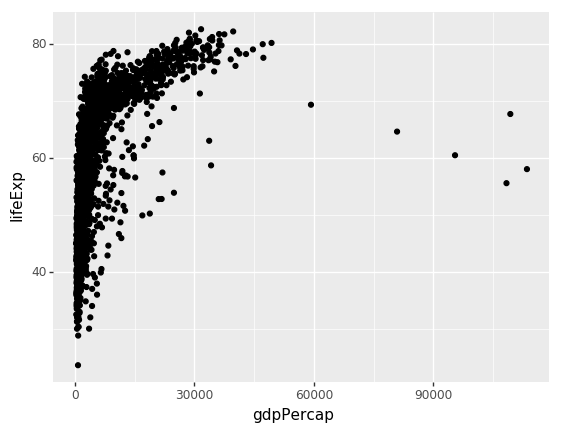

<ggplot: (-9223372029307179127)>

In [195]:
ggplot(gapminder, aes(x = 'gdpPercap', y ='lifeExp')) + geom_point()

So the first thing we do is call the `ggplot` function. This function lets Python know that we're creating a new plot, and any of the arguments we give the `ggplot` function are the *global* options for the plot: they apply to all layers on the plot.

We've passed in two arguments to `ggplot`. First, we tell `ggplot` what data we want to show on our figure, in this example the gapminder data we read in earlier. For the second argument we passed in the `aes` function which specifies how variables in the **data** should map to visual properties (aesthetics) of the figure, in this case the x and y locations. Here we told `ggplot` we want to plot the "gdpPercap" column of the gapminder data frame on the x-axis, and the "lifeExp" column on the y-axis. Notice that we didn't need to explicitly pass `aes` these columns (e.g. `x = gapminder.loc[, 'gdpPercap']`), this is because `ggplot` is smart enough to know to look in the **data** for that column!


Let's break this long command into parts:  
By itself, the call to `ggplot` isn't enough to draw a figure:

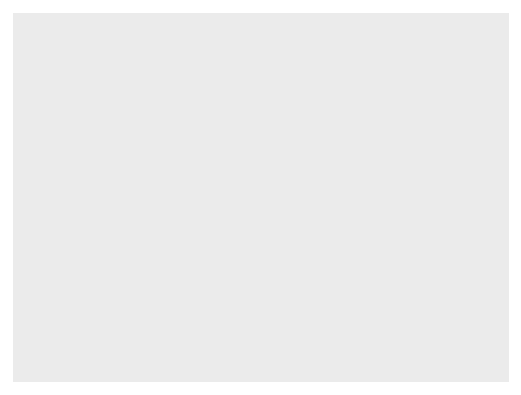

<ggplot: (-9223371933705732057)>

In [14]:
#initialize ggplot object and provide input dataset
ggplot(gapminder)

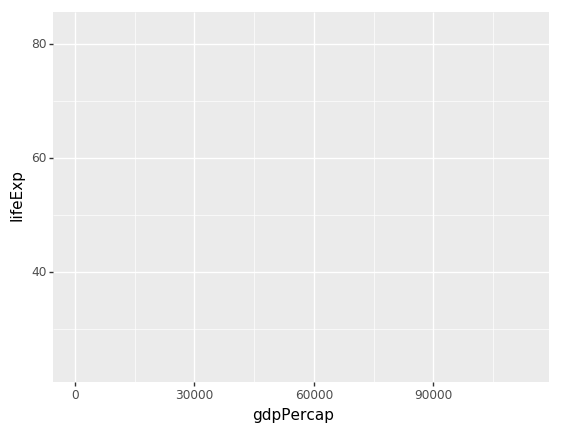

<ggplot: (-9223372029308608396)>

In [7]:
#add aesthetic mappings
ggplot(gapminder,aes(x = 'gdpPercap', y ='lifeExp'))

Now we need to specify how we want to visually represent the data, which we do by adding a new **geom** layer. In our example, we used `geom_point`, which means we want to visually represent the relationship between x and y as a scatterplot of points:

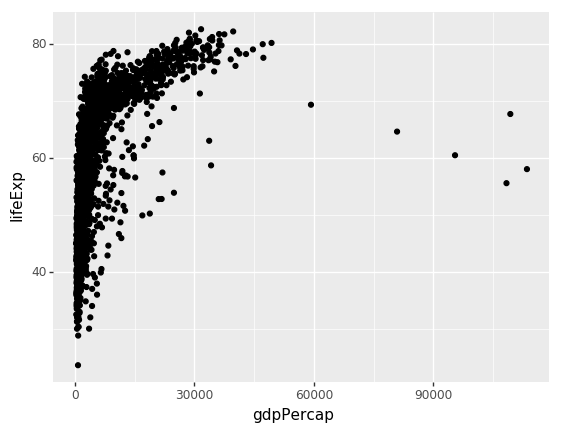

<ggplot: (7548627727)>

In [196]:
#add geom layer to display as points (geom_point())
ggplot(gapminder,aes(x = 'gdpPercap', y ='lifeExp'))+ geom_point()


And here you have it - your first plot with `plotnine`. This example illustrates the minimum number of components to build a plot:  
* data
* aesthetic mappings (aes)
* geometric oblects (geom)

> ### Challenge 1
>
> Modify the example so that the figure shows how life expectancy has changed over time:
> 
> 
> `ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp')) + geom_point()`
> 
> Hint: the gapminder dataset has a column called 'year', which should appear on the x-axis.
> 
> > #### Solution to challenge 1
> >
> > Here is one possible solution:
> >
> > `ggplot(gapminder, aes(x = 'year', y = 'lifeExp')) + geom_point()`
> > 
>

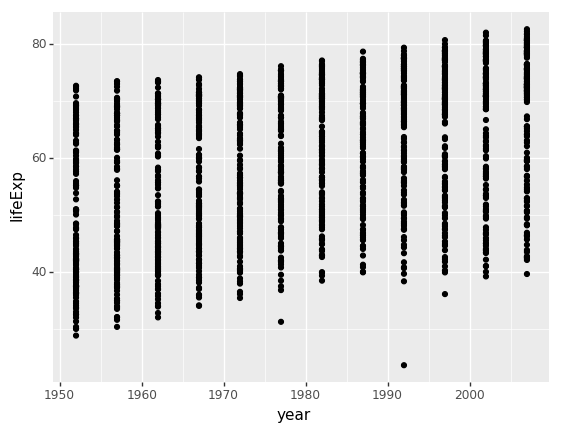

<ggplot: (-9223372029306611284)>

In [293]:
#Solution to challenge 1
ggplot(gapminder, aes(x = 'year', y = 'lifeExp')) + geom_point()

This is good, but it would be nice to separate the data points by continent, for example. We can visually separate data points that belong to different continents by assigning them a different color. We want to map data that specifies continent to visual color property of the plot. How would you do that?  
Let's take a look at our dataset again:

In [6]:
#how many data points for every year in the plot above?
gapminder.year.value_counts()

2007    142
2002    142
1997    142
1992    142
1987    142
1982    142
1977    142
1972    142
1967    142
1962    142
1957    142
1952    142
Name: year, dtype: int64

In [276]:
#what continents do the points belong to?
gapminder.groupby('year').continent.value_counts()

year  continent
1952  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania       2
1957  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania       2
1962  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania       2
1967  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania       2
1972  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania       2
1977  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania       2
1982  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania       2
1987  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania       2
1992  Africa       52
      Asia         33
      Europe       30
      Americas     25
      Oceania   

So, every year in the plot above is represented by data from all continents. When we want to map a variable from the data ('continent' in our case) to visual property ('color' in our case) we need to use `aes()` function:

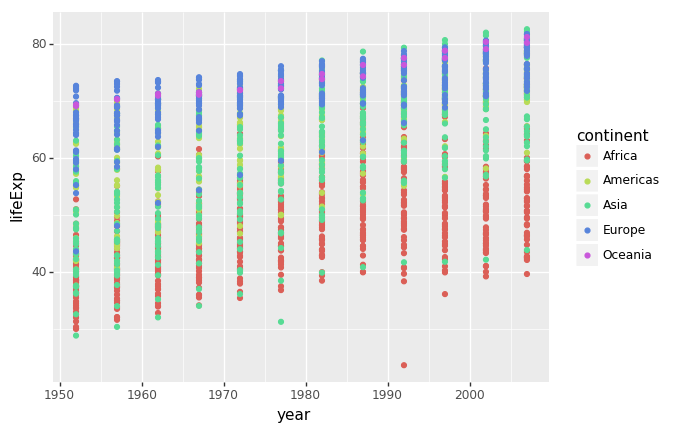

<ggplot: (-9223371933705789475)>

In [24]:
# Color data points by 'continent'
ggplot(gapminder, aes(x = 'year', y = 'lifeExp', color='continent')) + geom_point()

## Layers

Plotnine/ggplot plots are build with one layer on top of another. The layers that actually plot something are made with various `geom` functions.
We used `geom_point()` in the previous exmaple, but if we want to show data with lines, we can use geom_line().  


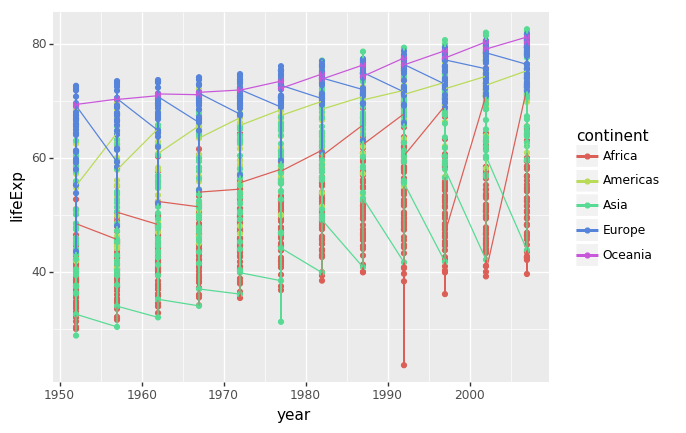

<ggplot: (7552965573)>

In [277]:
#Can you add lines to our plot of life expectancy over years?
ggplot(gapminder, aes(x = 'year', y = 'lifeExp', color='continent')) + \
    geom_point() + \
    geom_line()

Does not look very nice because plotnine attempts to connect all observations. We want to group them by country. Try this:

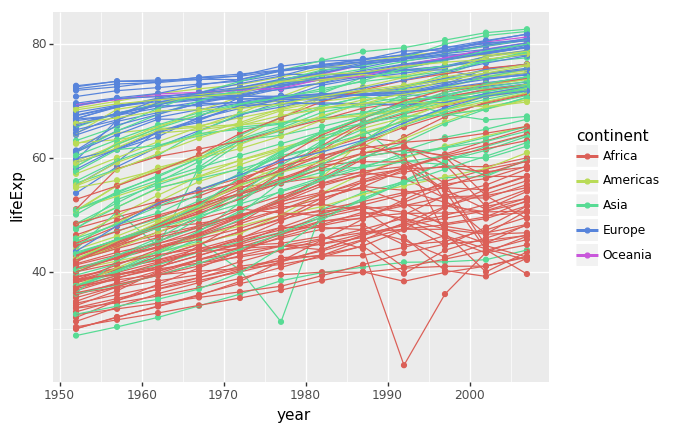

<ggplot: (-9223372029298818637)>

In [9]:
ggplot(gapminder, aes(x = 'year', y = 'lifeExp', color='continent', group='country')) + \
    geom_point() + \
    geom_line()

Notice that `group='country'` is relevant for `geom_line` layer, it directs how to connect data points with lines. Because we provided this maping to `ggplot()` finction, it applies to all layers of the plot. But you can apply easthetic mapping to each layer separately to make it clear which mappings are used in which layer.  
  
We can move `group='country'` aesthetics to `geom_line()` and have the same plot:  

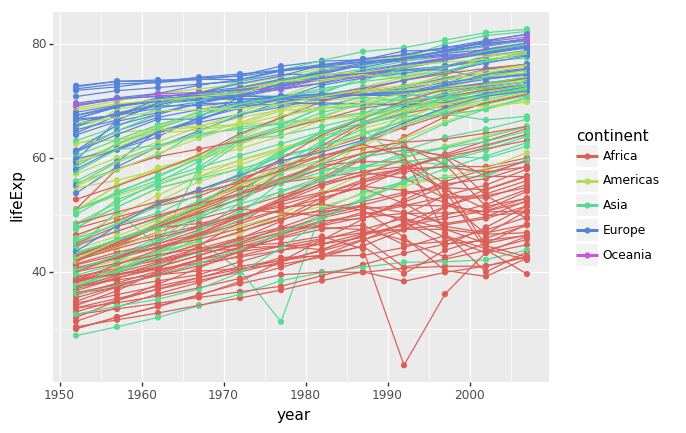

<ggplot: (7546793406)>

In [11]:
ggplot(gapminder, aes(x = 'year', y = 'lifeExp', color='continent')) + \
    geom_point() + \
    geom_line(aes(group='country'))

What will happen if we move `color='continent'` aesthetics to `geom_point()`?  What is different now and why?

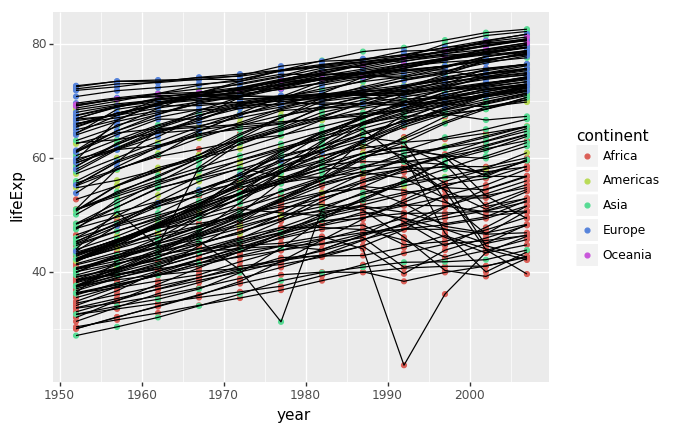

<ggplot: (7547368375)>

In [12]:
ggplot(gapminder, aes(x = 'year', y = 'lifeExp')) + \
    geom_point(aes(color='continent')) + \
    geom_line(aes(group='country'))

Coloring data by `continent` now only applies to `geom_point()`. Lines are colored black by default, but we can set any color we wish:

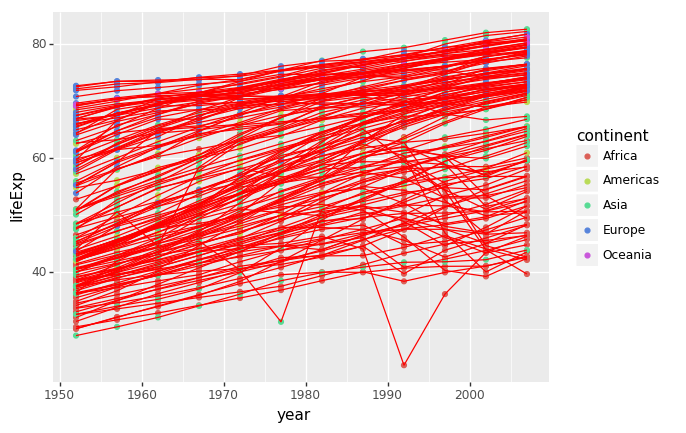

<ggplot: (7552415857)>

In [279]:
ggplot(gapminder, aes(x = 'year', y = 'lifeExp')) + \
       geom_point(aes(color='continent')) + \
       geom_line(aes(group='country'), color='red')

> ### Difference between mapping and setting aethetics
> When we use `geom_point(aes(color='continent'))`, ggplot will give a different color to each continent. But if we want to change the color of all line to red, we no longer need to use `aes()` function. Since we don't want to create a mapping to a specific variable, we simply move the color specification outside of the `aes()` function, like this: `geom_line(aes(group='country'), color='red')`.

## Important points so far:  
* to build a plot, we need data, aesthetic mappings, and geom layers
* each layer is added on top of another
* each layer can have its own aesthetic mappings
* visual properties of the plot (aesthetics) can be **mapped** with `aes()` funcion or **set** to specific values

> ### Challenge 2
>
> Modify the example so that the figure shows lines colored by `continent` with yellow points on top of the lines.
> 
> 
> `ggplot(gapminder, aes(x = 'year', y = 'lifeExp')) + \
       geom_point(aes(color='continent')) + \
       geom_line(aes(group='country'), color='red')`
> 
> 
> 
> > #### Solution to challenge 2
> >
> > `ggplot(gapminder, aes(x = 'year', y = 'lifeExp')) + \
       geom_line(aes(group='country',color='continent')) + \
       geom_point(color='yellow')`
> > 
>

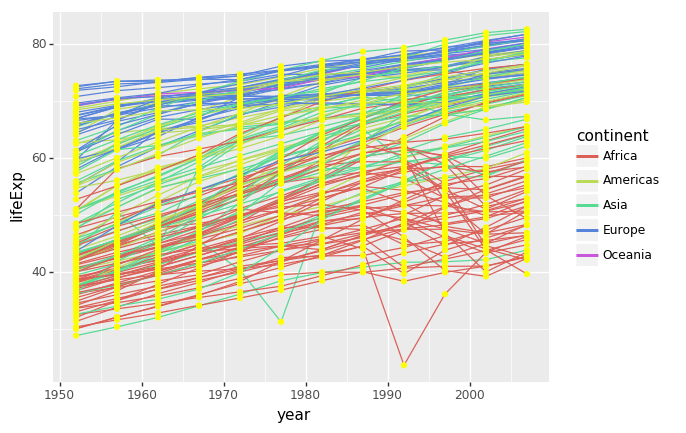

<ggplot: (-9223372029301811284)>

In [280]:
ggplot(gapminder, aes(x = 'year', y = 'lifeExp')) + \
       geom_line(aes(group='country',color='continent')) + \
       geom_point(color='yellow')

In addition to mapping or setting aesthetic for each layer, you can also specify different data for every layer. For example, let's modify solution to challenge 2 to highlight Norway by plotting points ONLY for this country:

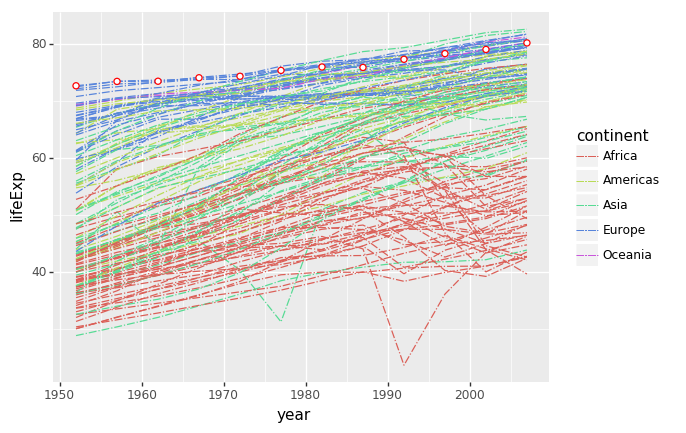

<ggplot: (7552435492)>

In [281]:
ggplot(gapminder, aes(x = 'year', y = 'lifeExp')) + \
       geom_line(aes(group='country',color='continent'),linetype='-.') + \
       geom_point(gapminder.loc[gapminder['country']=='Norway', ], color='red', fill='white', size=2)

**Take a look at plotnine documentation**   
Explore plotnine documentation to get an idea about the funcitonality of plotnine. Take a look at what geoms are available - there are over 40 geoms to play with!  
https://plotnine.readthedocs.io/en/stable/api.html#geoms  

You can see which parameters can be supplied to each geom, and what aesthetics are available for each geom.  
Here is an example with `geom_point()`  
https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html#plotnine.geoms.geom_point  

Documentation for `ggplot2` package can also be of help:  
https://ggplot2.tidyverse.org/


## Transformations and statistics
`ggplot` also makes it easy to overlay statistical models over the data. To demonstrate we'll go back to our first example:

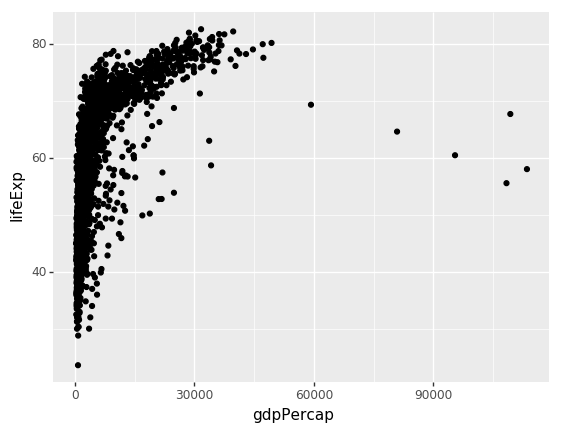

<ggplot: (7548052614)>

In [37]:
ggplot(gapminder, aes(x = 'gdpPercap', y ='lifeExp')) + geom_point()

Currently it's hard to see the relationship between the points due to some strong outliers in GDP per capita. We can change the scale of units on the x axis using the scale functions. These control the mapping between the data values and visual values of an aesthetic. We can also modify the transparency of the points, using the alpha function, which is especially helpful when you have a large amount of data which is very clustered.

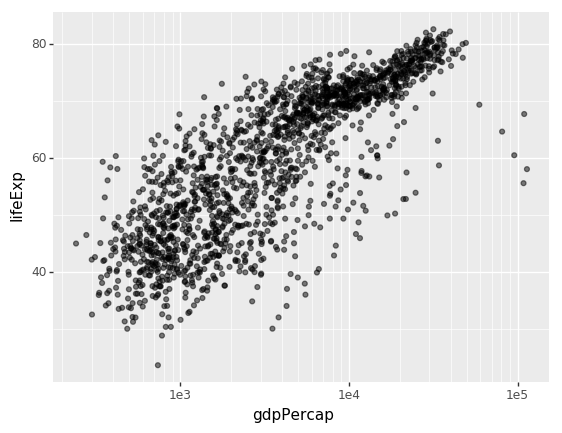

<ggplot: (-9223372029304444619)>

In [258]:
ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp')) + \
    geom_point(alpha = 0.5) + \
    scale_x_log10()

The `log10` function changes the x-axis scale from linear to logarithmic. This makes it easier to visualize the spread of data on the x-axis.  
> ### Reminder: Setting an aesthetic to a value instead of a mapping
> Notice that we used `geom_point(alpha = 0.5)`. As was mentioned earlier, using a setting outside of the `aes()` function will cause this value to be used for all points, which is what we want in this case. But just like any other aesthetic setting, alpha can also be mapped to a variable in the data. For example, we can give a different transparency to each continent with `geom_point(aes(alpha = continent))`.

We can fit a simple relationship to the data by adding another layer, geom_smooth:

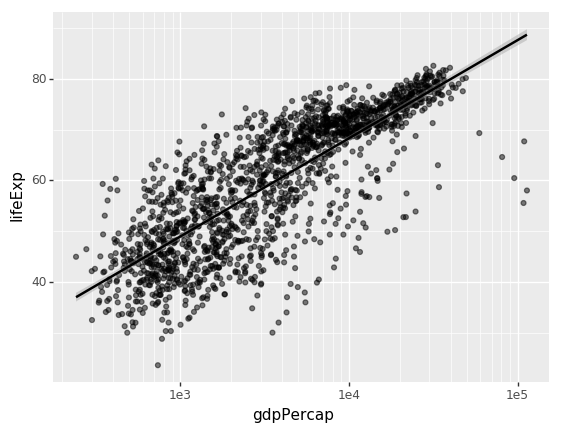

<ggplot: (-9223372029302399863)>

In [259]:
ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp')) + \
       geom_point(alpha = 0.5) + \
       scale_x_log10() + \
       geom_smooth(method='lm')

We can make the line thicker by setting the **size** aesthetic in the geom_smooth layer:

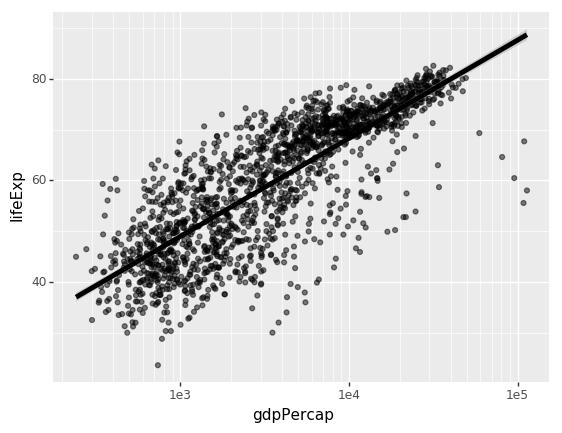

<ggplot: (7552789256)>

In [260]:
ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp')) + \
       geom_point(alpha = 0.5) + \
       scale_x_log10() + \
       geom_smooth(method='lm', size=2)

There are two ways an aesthetic can be specified. Here we set the **size** aesthetic by passing it as an argument to `geom_smooth`. Previously in the lesson we've used the `aes` function to define a *mapping* between data variables and their visual representation.

> ### Challenge 4a
> Modify the color and size of the points on the point layer in the previous example.
>
> Hint: do not use `aes` function  
>

> > #### Solution to challenge 4a  
> >
> > `ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp')) + \
       geom_point(alpha = 0.5, color='orange', size=2) + \
       scale_x_log10() + \
       geom_smooth(method='lm', size=2)`
> > 

> ### Challenge 4b
> Modify solution to 4a so that the points are now a different shape and are colored by continent with new trendlines.  
> Hints: 1)The color argument can be used inside the `aes`  
         2)Look up documentation for default shape aesthetic:  
         https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html#plotnine.geoms.geom_point

> > #### Solution to challenge 4b 
> >
> > `ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp', color='continent')) + \
       geom_point(alpha = 0.5, size=2, shape=8) + \
       scale_x_log10() + \
       geom_smooth(method='lm', size=2)`
> > 




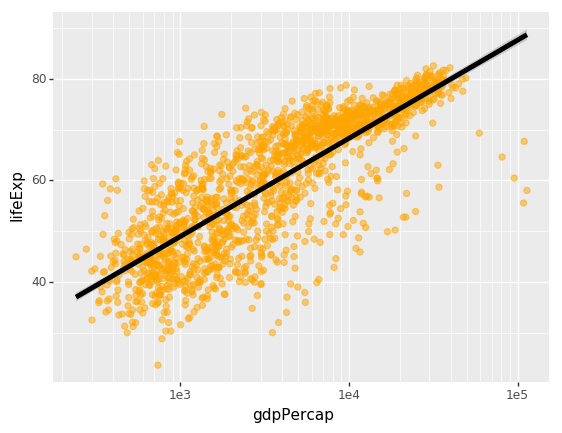

<ggplot: (7547278635)>

In [291]:
# Solution to challenge 4a
ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp')) + \
       geom_point(alpha = 0.5, color='orange', size=2) + \
       scale_x_log10() + \
       geom_smooth(method='lm', size=2)

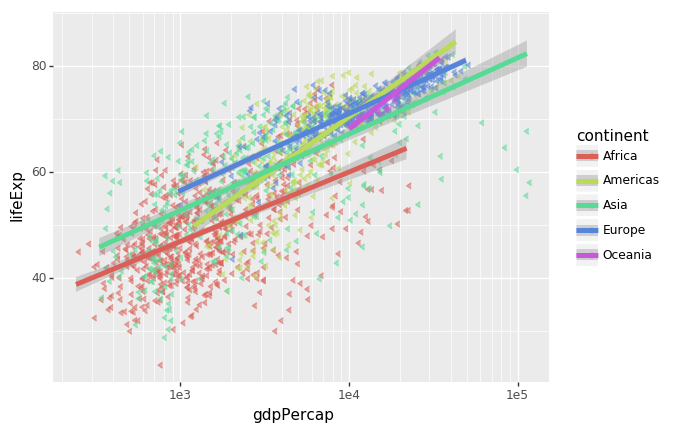

<ggplot: (-9223372029298182368)>

In [18]:
# Solution to challenge 4b
ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp', color='continent')) + \
       geom_point(alpha = 0.5, size=2, shape=4) + \
       scale_x_log10() + \
       geom_smooth(method='lm', size=2)

## Multi-panel figures

Let's go back to our life expectancy over time plot


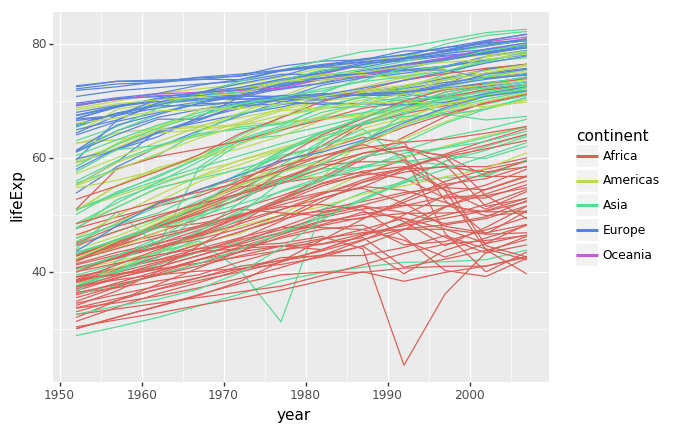

<ggplot: (-9223372029308531824)>

In [56]:
ggplot(gapminder, aes(x = 'year', y = 'lifeExp', color='continent', group='country')) + \
    geom_line()

Here we visualized the change in life expectancy over time across all countries in one plot. Alternatively, we can split this out over multiple panels by adding a layer of **facet** panels. Focusing only on those countries with names that start with the letter "A" or "Z".  

We start by subsetting the data. We use the `str.startswith()` method to pull out the first part of a string. Our goal is to get the dtaframe with countries that start with "A" or "Z".


In [263]:
#select AZ countires
countries = gapminder.loc[gapminder.country.str.startswith('A') | gapminder.country.str.startswith('Z'),]
print(countries.country.unique())


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Zambia' 'Zimbabwe']


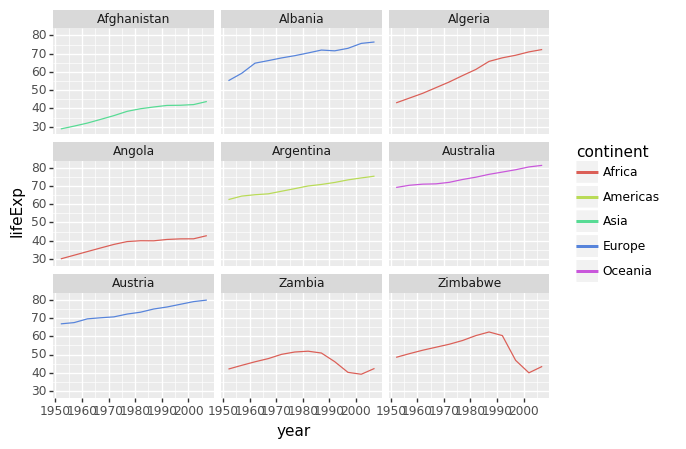

<ggplot: (-9223372029308532655)>

In [268]:
ggplot(countries, aes(x = 'year', y = 'lifeExp', color='continent')) + \
    geom_line() + \
    facet_wrap('~country')

`facet_wrap()` function tells plotnine to draw a panel for each country in the `countries` dataset. Faceting effectively replaces `bygroup` aesthetic by splitting data for each country into a separate panel.

## Modifying text

To clean this figure up for a publication we need to change some of the text elements. The x-axis is too cluttered, and the y axis should read "*Life expectancy*", rather than the column name in the data frame.

We can do this by adding a couple of different layers. The theme layer controls the axis text, and overall text size. Labels for the axes, plot title and any legend can be set using the labs function. Legend titles are set using the same names we used in the aes specification. Thus, the color legend title is set using color = "Continent". 

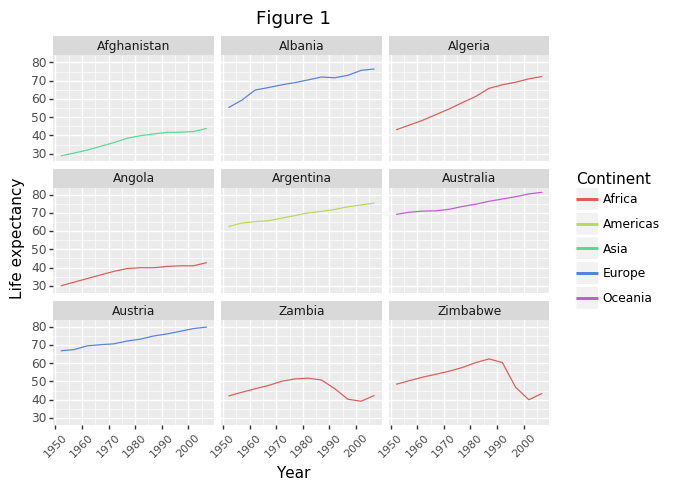

<ggplot: (-9223372029301387383)>

In [269]:
ggplot(countries, aes(x = 'year', y = 'lifeExp', color='continent'))+ \
    geom_line() + \
    facet_wrap('~country') + \
    labs(
       x = 'Year',
       y = 'Life expectancy',
       title = 'Figure 1',      
       color = 'Continent'      
       ) +\
    theme(axis_text_x=element_text(size=8,rotation=45))

**Saving plot**. 
Assign plot to a variable and save:  

In [288]:
p=ggplot(countries, aes(x = 'year', y = 'lifeExp', color='continent'))+ \
    geom_line() + \
    facet_wrap('~country') + \
    labs(
       x = 'Year',
       y = 'Life expectancy',
       title = 'Figure 1',      
       color = 'Continent'      
       ) +\
    theme(axis_text_x=element_text(size=8,rotation=45))

p.save("facets.png",width=10,height=10, dpi=300)

/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 10 x 10 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: facets.png
  warn('Filename: {}'.format(filename))


> ## Challenge 5
>
> This is the plot we started with today:  
> `ggplot(gapminder, aes(x = 'gdpPercap', y ='lifeExp')) + geom_point()`
> 
> Modify this plot to show the relationship between life expectancy and GDP per capita
> for every continent on a separate panel.
>
> * Map continents to `fill` asthetic and set `color` aesthetic to black in `geom_point` layer
> * Convert linear scale for x-axis to log scale with `scale_x_log10()` function
> * Fit line to datapoints with `geom_smooth(method='lm')` function
> * Add plot title, legend title and correct x and y labels with `labs()` function
> * Show each continent in different panel with `facet_wrap()` function
 
> > ### Solution to Challenge 5
> >
> > Extra feature: set colorblind-friendly color palette. You can also select colors of your choice:
> > https://www.w3schools.com/colors/colors_picker.asp  
> > Use the list of colors as an argument to `scale_fill_manual()` function to change the default point colors.
> >
> > `cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#D55E00"]
    ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp')) + \
        geom_point(aes(fill='continent'),alpha=0.5,size=3,color='black',show_legend=False) + \
        scale_fill_manual(values=cbPalette) +\
        scale_x_log10() + \
        geom_smooth(method='lm', size=1, color='black') +\
        labs(x="GDP per capita", y="Life Expectancy") +\
        facet_wrap('~continent')`



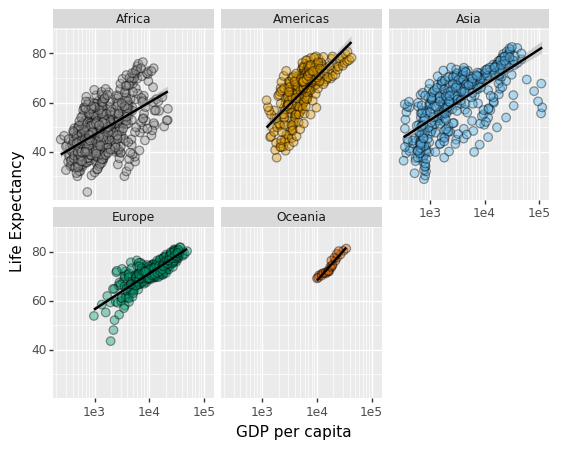

<ggplot: (7556127815)>

In [19]:
# Solution to Challenge 5
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#D55E00"]
ggplot(gapminder, aes(x = 'gdpPercap', y = 'lifeExp')) + \
    geom_point(aes(fill='continent'),alpha=0.4, size=3,color='black',show_legend=False) + \
    scale_fill_manual(values=cbPalette) +\
    scale_x_log10() + \
    geom_smooth(method='lm', size=1, color='black') +\
    labs(x="GDP per capita", y="Life Expectancy") +\
    facet_wrap('~continent')


> ## Challenge 6
>
> Try using `geom_bar`.  
> First think what you want to plot.  
> Then subset the data to make plotting easier.  
> Read error messages! Most likely, you would want to set `stat=stat_identity` as `geom_bar` argument.  
> Take a look at this exampe if you run intro problems - try adapting it to your task:    
> https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-show-counts-and-percentages-for-bar-plots.html
>
> > ### Exmples for  Challenge 6
> >
> > Example1: Count of counries by continent  
> >
> > `ggplot(gapminder[gapminder.year==1957], aes(x='continent')) + geom_bar(aes(fill='continent'))`
> >
> >
> > Example2: population size of countries on Oceania continent by year  
> >
> > `ggplot(gapminder.loc[(gapminder.continent=='Oceania')], aes(x = 'country', y = 'pop')) +\
    geom_bar(aes(fill='country'), stat=stat_identity, show_legend=False) + \
    labs(y='Population size') +\
    facet_wrap('~year') +\
    theme(axis_text_x=element_text(size=10,rotation=45))`
> >



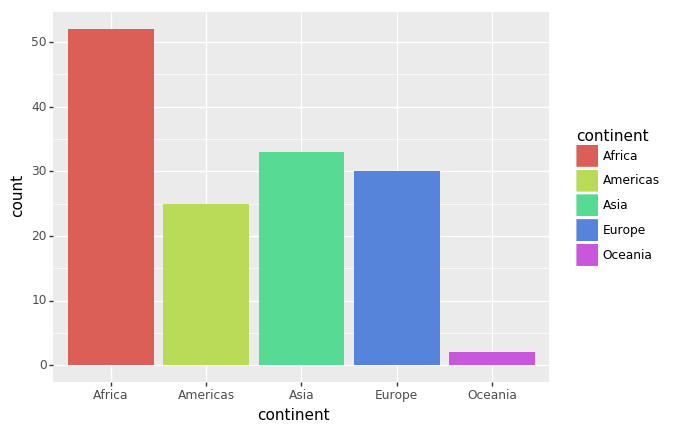

<ggplot: (7553398322)>

In [289]:
# Example1: count of counries by continent
ggplot(gapminder[gapminder.year==1957], aes(x='continent')) + geom_bar(aes(fill='continent'))

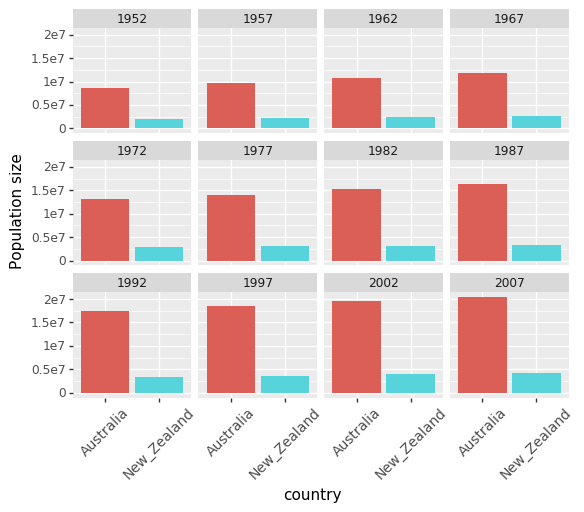

<ggplot: (7553076558)>

In [284]:
# Example2: population size of countries on Oceania continent by year
ggplot(gapminder.loc[(gapminder.continent=='Oceania')], aes(x = 'country', y = 'pop')) +\
    geom_bar(aes(fill='country'), stat=stat_identity, show_legend=False) + \
    labs(y='Population size') +\
    facet_wrap('~year') +\
    theme(axis_text_x=element_text(size=10,rotation=45))

This is a taste of what you can do with `Plotnine`. 
Here are some resources available online. Remember, plotnine is the implementation of R package `ggplot2`, and you can often use ggplot2 documentation. But not always!!!  
Finally, if you have no idea how to change something, a quick Google search will usually send you to a relevant question and answer on Stack Overflow with reusable code to modify!  

**Resources** 

_Documentation:_  
https://plotnine.readthedocs.io/en/stable/index.html
https://ggplot2.tidyverse.org/reference/  
_Example:_  
http://www.danielrothenberg.com/blog/2017/Jul/declarative-visualization-in-python-update/  
_Working with color:_  
http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
